# [Spotify Song & Genre Analysis, Popularity Prediction and Building a Simple Recommendation System - 9]

Group Members: 

Sude Buket Kipri 28368

Umut Şahin Önder 28248

Rüya Buse Dinmezel 28195



## Introduction

<font color="black">
As the dataset provides many songs with pre-calculated features along with the genre information, there is a huge potential to analyze how these features change with different genres. In the exploratory data analysis part, we will be interpreting the relationships among features with the help of visual explanations -graphs- and analyze the most popular songs. As for the hypothesis testing part, we will apply statistical tests to see if there are significant differences between various features and genres over time. Then we will be building a simple recommendation model based on feature similarities of songs in the dataset. As the dataset spans over a long time, how the features of genres change over time will be analyzed. Since music is a high demand sector and we’re all interested in it, we decided to work on this topic especially with Spotify data in order to gain more knowledge on various features. 
</font>

In [ ]:
from google.colab import drive
drive.mount('./drive', force_remount=True)

path_prefix = './drive/My Drive'

Mounted at ./drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from os.path import join
from os import listdir
import seaborn as sns
import re


sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
filename = "data.csv"
df = pd.read_csv(join(path_prefix, filename))

In [ ]:
df['artists'] = df['artists'].apply(lambda x: re.findall(r'[\']([\w\s-]+)[\']', x))
df = df.explode('artists')

In [ ]:
df.isna().sum()

acousticness            0
artists             10719
danceability            0
duration_ms             0
energy                  0
explicit                0
id                      0
instrumentalness        0
key                     0
liveness                0
loudness                0
mode                    0
name                    0
popularity              0
release_date            0
speechiness             0
tempo                   0
valence                 0
year                    0
dtype: int64

In [ ]:
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,229540.000000,229540.000000,2.295400e+05,229540.000000,229540.000000,229540.000000,229540.000000,229540.000000,229540.000000,229540.000000,229540.000000,229540.000000,229540.000000,229540.000000,229540.000000
mean,0.549971,0.519929,2.392904e+05,0.450814,0.068785,0.221009,5.178431,0.214696,-12.473253,0.701385,23.579973,0.106806,115.411927,0.494788,1975.397369
std,0.385812,0.184887,1.563314e+05,0.277079,0.253089,0.349366,3.511733,0.182460,6.140914,0.457651,22.144985,0.180134,30.421248,0.271465,27.679481
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.120750,0.386000,1.653138e+05,0.212000,0.000000,0.000001,2.000000,0.100000,-16.109000,0.000000,0.000000,0.036200,91.765000,0.264000,1952.000000
50%,0.644000,0.530000,2.075330e+05,0.416000,0.000000,0.000953,5.000000,0.140000,-11.534000,1.000000,21.000000,0.046200,113.983500,0.500000,1974.000000
75%,0.943000,0.661000,2.727902e+05,0.680000,0.000000,0.413000,8.000000,0.275000,-7.775000,1.000000,40.000000,0.078000,133.820000,0.720000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


In [ ]:
df.shape

(229540, 19)

In [ ]:
df.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

In [ ]:
df.tail()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
174384,0.00917,Tony T,0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.00006,6,0.178,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.186,2020
174385,0.79500,Alessia Cara,0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.00000,4,0.196,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.228,2021
174386,0.80600,Roger Fly,0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.92000,4,0.113,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.714,2020
174387,0.92000,Taylor Swift,0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.00000,0,0.113,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.320,2021
174388,0.23900,Roger Fly,0.677,197710,0.460,0,57tgYkWQTNHVFEt6xDKKZj,0.89100,7,0.215,-12.237,1,Improvisations,0,2020-12-09,0.0258,112.208,0.747,2020


In [ ]:
filename1 = "data_by_genres.csv"
dfByGenre = pd.read_csv(join(path_prefix, filename1))

In [ ]:
dfByGenre.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
count,3232.000000,3232.000000,3.232000e+03,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,0.368161,0.540810,2.614567e+05,0.583474,0.254888,0.204010,-10.396208,0.084999,119.707549,0.483757,29.701618,5.942450,0.819926
std,0.319697,0.149353,1.255810e+05,0.232931,0.283907,0.103440,5.024042,0.081157,17.333590,0.200382,18.415394,3.342851,0.384309
min,0.000001,0.063200,3.094600e+04,0.000953,0.000000,0.016500,-40.637000,0.024300,61.364269,0.019285,0.000000,0.000000,0.000000
25%,0.082914,0.450250,2.068497e+05,0.419648,0.013383,0.142317,-12.212486,0.046431,109.480352,0.341571,15.190070,3.000000,1.000000
50%,0.280119,0.550334,2.418786e+05,0.622982,0.128343,0.185618,-9.097583,0.060769,120.142000,0.488364,32.181281,7.000000,1.000000
75%,0.629265,0.645470,2.873741e+05,0.756599,0.443383,0.233807,-7.038634,0.091795,128.253833,0.626171,43.069058,9.000000,1.000000
max,0.996000,0.940000,3.478338e+06,0.999000,0.984000,0.944000,-0.862000,0.956000,211.968000,0.997000,79.000000,11.000000,1.000000


In [ ]:
dfByGenre.dtypes

genres               object
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity          float64
key                   int64
mode                  int64
dtype: object

In [ ]:
genre_group=dfByGenre.groupby(by="genres") 
genre_group["popularity"].mean()

genres
21st century classical     6.600000
432hz                     41.200000
8-bit                      0.000000
[]                        12.350770
a cappella                39.086248
                            ...    
zim urban groove           9.000000
zolo                      31.108254
zouk                      32.555556
zurich indie               0.000000
zydeco                    27.703810
Name: popularity, Length: 3232, dtype: float64

In [ ]:
filename2 = "data_by_artist.csv"
dfByArtist = pd.read_csv(join(path_prefix, filename2))

In [ ]:
dfByArtist.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
count,32539.000000,32539.000000,3.253900e+04,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000
mean,0.455682,0.552737,2.485982e+05,0.525908,0.233281,0.209035,-11.008171,0.092047,117.433745,0.498812,24.473452,5.459787,0.734903,12.561818
std,0.383678,0.176445,1.581808e+05,0.267402,0.334487,0.151781,5.568630,0.111257,24.467506,0.247154,23.021041,3.473653,0.441392,52.407821
min,0.000000,0.000000,8.042000e+03,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.055155,0.436487,1.804616e+05,0.299000,0.000012,0.109000,-13.792500,0.039700,100.983500,0.305792,0.000000,2.000000,0.000000,2.000000
50%,0.391833,0.563000,2.215070e+05,0.537375,0.009550,0.162000,-9.887000,0.052822,118.779000,0.506000,22.666667,6.000000,1.000000,2.000000
75%,0.876000,0.684500,2.815870e+05,0.747039,0.451149,0.259500,-6.944500,0.090800,130.552000,0.691500,43.141941,8.000000,1.000000,7.000000
max,0.996000,0.987000,4.696690e+06,1.000000,1.000000,0.986000,3.367000,0.971000,219.833000,0.997000,94.000000,11.000000,1.000000,3179.000000


In [ ]:
dfByArtist.dtypes

artists              object
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity          float64
key                   int64
mode                  int64
count                 int64
dtype: object

In [ ]:
filename3 = "data_by_year.csv"
dfByYear = pd.read_csv(join(path_prefix, filename3))

In [ ]:
dfByYear.describe()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.0
mean,1970.500000,0.548818,0.536939,228698.383547,0.455189,0.214148,0.212475,-12.192694,0.116602,116.096664,0.530724,22.949745,3.794118,1.0
std,29.588849,0.271056,0.049568,28440.517398,0.164968,0.109135,0.016892,3.048535,0.107207,5.944764,0.058941,16.780564,3.518940,0.0
min,1920.000000,0.189632,0.415141,140135.140496,0.208856,0.099986,0.162309,-20.840083,0.051205,100.033149,0.378276,0.090909,0.000000,1.0
25%,1945.250000,0.298426,0.501910,211933.800750,0.280230,0.124572,0.200305,-14.298878,0.064468,111.042118,0.492407,3.315919,0.000000,1.0
50%,1970.500000,0.458340,0.541315,238300.393513,0.494563,0.182022,0.212563,-11.849556,0.084892,117.813859,0.541784,29.160167,2.000000,1.0
75%,1995.750000,0.843186,0.573307,249445.435116,0.595108,0.283295,0.222198,-9.756256,0.101711,120.635131,0.570131,36.105230,7.000000,1.0
max,2021.000000,0.962702,0.655929,284759.933638,0.694245,0.581701,0.262480,-7.376558,0.627131,125.203277,0.669676,50.873598,10.000000,1.0


In [ ]:
filename4 = "data_w_genres.csv"
df_genre = pd.read_csv(join(path_prefix, filename4))

In [ ]:
df_genre.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
count,32539.000000,32539.000000,3.253900e+04,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000
mean,0.455682,0.552737,2.485982e+05,0.525908,0.233281,0.209035,-11.008171,0.092047,117.433745,0.498812,24.473452,5.459787,0.734903,12.561818
std,0.383678,0.176445,1.581808e+05,0.267402,0.334487,0.151781,5.568630,0.111257,24.467506,0.247154,23.021041,3.473653,0.441392,52.407821
min,0.000000,0.000000,8.042000e+03,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.055155,0.436487,1.804616e+05,0.299000,0.000012,0.109000,-13.792500,0.039700,100.983500,0.305792,0.000000,2.000000,0.000000,2.000000
50%,0.391833,0.563000,2.215070e+05,0.537375,0.009550,0.162000,-9.887000,0.052822,118.779000,0.506000,22.666667,6.000000,1.000000,2.000000
75%,0.876000,0.684500,2.815870e+05,0.747039,0.451149,0.259500,-6.944500,0.090800,130.552000,0.691500,43.141941,8.000000,1.000000,7.000000
max,0.996000,0.987000,4.696690e+06,1.000000,1.000000,0.986000,3.367000,0.971000,219.833000,0.997000,94.000000,11.000000,1.000000,3179.000000


In [ ]:
df_genre2=df_genre.drop(["acousticness", "danceability","duration_ms","energy",	"instrumentalness", "liveness",	"loudness",	"speechiness",	"tempo",	"valence","popularity", "key", "mode", "count"], axis=1)
df_genre2

,artists,genres
0,"""Cats"" 1981 Original London Cast",['show tunes']
1,"""Cats"" 1983 Broadway Cast",[]
2,"""Fiddler On The Roof” Motion Picture Chorus",[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",[]
...,...,...
32534,김효근,[]
32535,나율,[]
32536,미스티,[]
32537,시온 Zion & 한해 Hanhae of 팬텀 Phantom,[]


In [ ]:
dfmerged = pd.merge(df, df_genre2, on="artists")
DfMerged = dfmerged
#DfMerged = merged.drop(["acousticness_y", "danceability_y","duration_ms_y","energy_y","instrumentalness_y","liveness_y","loudness_y","speechiness_y","tempo_y","valence_y","popularity_y","key_y","mode_y"], axis=1)

In [ ]:
DfMerged.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,genres
0,0.991,Mamie Smith,0.598,168333,0.2240,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.379,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.634,1920,"['harlem renaissance', 'traditional blues']"
1,0.993,Mamie Smith,0.647,163827,0.1860,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.519,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.689,1920,"['harlem renaissance', 'traditional blues']"
2,0.992,Mamie Smith,0.782,195200,0.0573,0,5DlCyqLyX2AOVDTjjkDZ8x,0.000002,5,0.176,-12.453,1,Don't You Advertise Your Man,5,1920,0.0592,85.652,0.487,1920,"['harlem renaissance', 'traditional blues']"
3,0.995,Mamie Smith,0.482,198000,0.2290,0,0lqEx4vktZP1y9hnwfF27Y,0.000061,7,0.549,-12.619,1,Kansas City Man Blues - 78rpm Version,4,1920,0.0812,77.232,0.461,1920,"['harlem renaissance', 'traditional blues']"
4,0.992,Mamie Smith,0.574,189800,0.1380,0,4HYmmG8uHL2hP4zSFWavKF,0.000492,3,0.233,-14.171,1,Miss Jenny's Ball (aka There'll Be No Freebies...,1,1920,0.1090,158.422,0.764,1920,"['harlem renaissance', 'traditional blues']"


In [ ]:
DfMerged['genres'] = DfMerged['genres'].apply(lambda x: re.findall(r'[\']([\w\s-]+)[\']', x))

In [ ]:
DfMerged = DfMerged.explode('genres')

In [ ]:
DfMerged.shape

(840058, 20)

# Exploratory Data Analysis

## Visualizations Descriptive Statistics

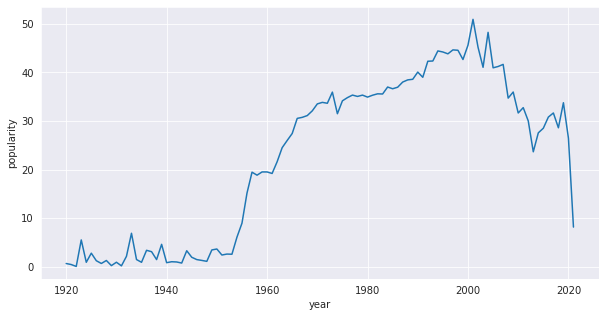

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
df.groupby("year").popularity.mean().plot()
plt.ylabel("popularity");

> This figure Shows the Average popularity of songs according to year. In early 2000's there is a peak this would suggest that those year's music are more poupular however there might exist a recency bias.

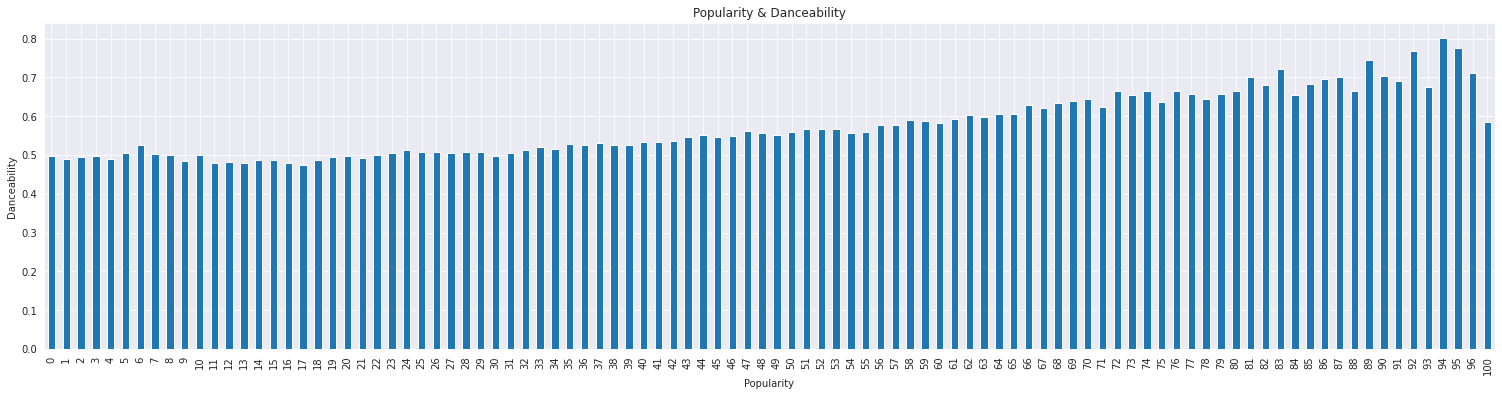

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(26, 6))

ax = df.groupby(by = "popularity").mean().sort_values(by = "popularity")['danceability'].plot.bar()

plt.title("Popularity & Danceability")
plt.ylabel("Danceability")
plt.xlabel("Popularity")
plt.show();



>This figure represents the relationship between song's popularity and it's danceability feature. The bar chart suggests positive correlation between Popularity & Danceability. And danceability peaks at 0.988000 when there is 94% popularity.

### Visualizations of Aggregated Forms Based on Features

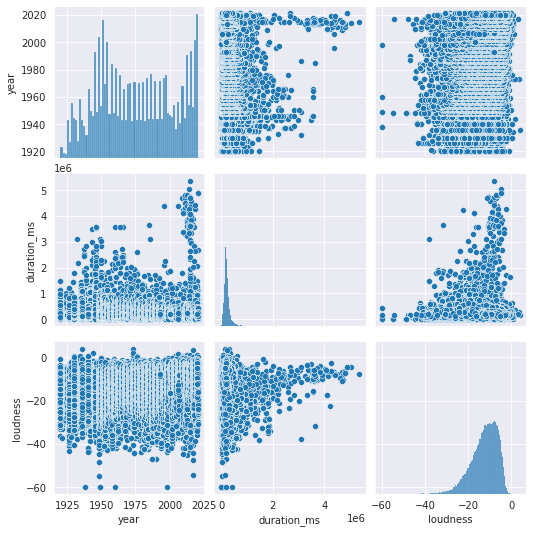

In [ ]:
sns.pairplot(df[['year', 'duration_ms', 'loudness']]);

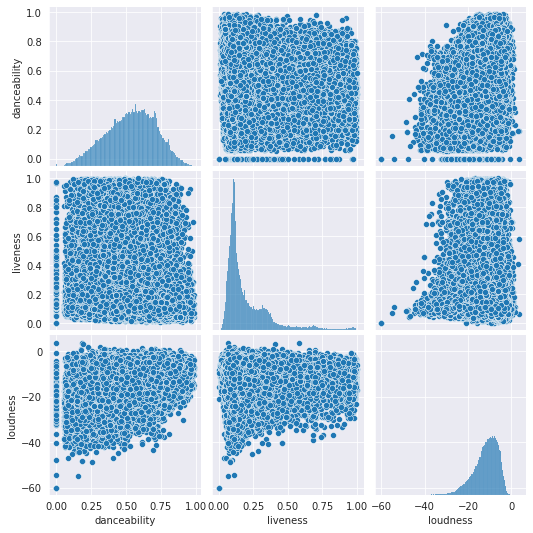

In [ ]:
sns.pairplot(df[['danceability', 'liveness', 'loudness']]);

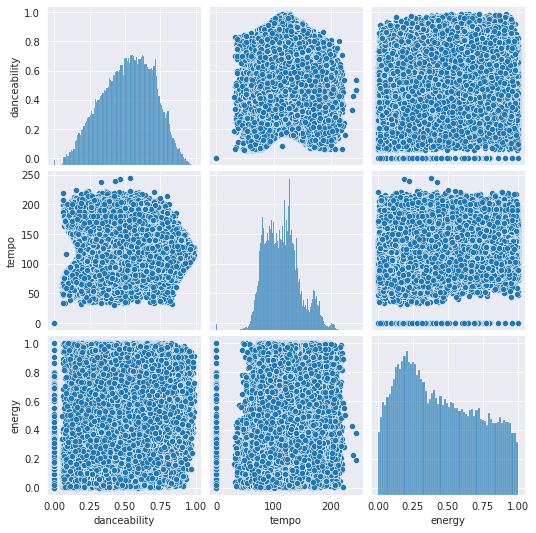

In [ ]:
sns.pairplot(df[['danceability', 'tempo', 'energy']]);

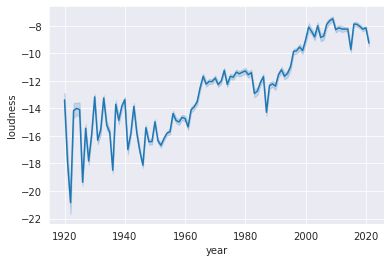

In [ ]:
sns.lineplot(x="year", y="loudness", data=df);


> This Plot shows the correlation beetween Years and The Mean of Loudness. It can be seen that there is a positive correlation, As the years went on loudness usually increased. This would be caused by many reasons such as the taste in music or advancement in music recording.



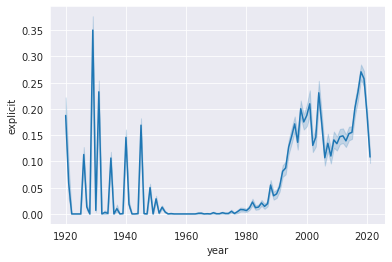

In [ ]:
sns.lineplot(x="year", y="explicit", data=df);



> This line chart show how mean measurement explicity of songs changes over years. In 1930s there is a peak in explicity and between the years of 1960 and 1980 explicity is relatively stable.





In [ ]:
dfByGenre.groupby(by="genres").mean() 

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
genres,,,,,,,,,,,,,
21st century classical,0.754600,0.284100,3.525932e+05,0.159580,0.484374,0.168580,-22.153400,0.062060,91.351000,0.143380,6.600000,4,1
432hz,0.485515,0.312000,1.047430e+06,0.391678,0.477250,0.265940,-18.131267,0.071717,118.900933,0.236483,41.200000,11,1
8-bit,0.028900,0.673000,1.334540e+05,0.950000,0.630000,0.069000,-7.899000,0.292000,192.816000,0.997000,0.000000,5,1
[],0.535793,0.546937,2.495312e+05,0.485430,0.278442,0.220970,-11.624754,0.101511,116.068980,0.486361,12.350770,7,1
a cappella,0.694276,0.516172,2.018391e+05,0.330533,0.036080,0.222983,-12.656547,0.083627,105.506031,0.454077,39.086248,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
zim urban groove,0.003910,0.553000,4.267200e+04,0.942000,0.961000,0.113000,-8.004000,0.039900,134.995000,0.752000,9.000000,7,1
zolo,0.208648,0.533837,2.641016e+05,0.620470,0.163334,0.201430,-10.878906,0.061828,126.765194,0.576721,31.108254,9,1
zouk,0.272928,0.641889,4.416418e+05,0.695778,0.257604,0.166011,-9.518889,0.050511,105.848889,0.878444,32.555556,7,1


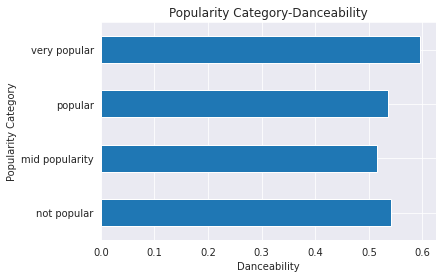

In [ ]:
def categorize_popularity(pop):
  if pop < 15:
    return "not popular"
  elif pop< 30:
    return "mid popularity"
  elif pop < 50:
    return "popular"
  elif pop < 100:
    return "very popular"
  return "not popular"

dfByGenre["Popularity Category"] = dfByGenre["popularity"].apply(categorize_popularity)

ax = dfByGenre.groupby("Popularity Category").mean()["danceability"][["not popular", "mid popularity","popular", "very popular"]].plot.barh(grid=True)
ax.set_xlabel("Danceability")
ax.set_title("Popularity Category-Danceability");

> This Graph Categorizes songs according to their mean popularity and then compares their mean Danceability. It can be observed that Popular and Not Popular songs have more dancability. This might be due to the fact that Danceability in songs are a hit or miss situation.

In [ ]:
def categorize_genre(genre):
  if (genre.find("rock")!=-1):
    return "Rock"
  elif (genre.find("pop")!=-1):
    return "Pop"
  elif (genre.find("indie")!=-1):
    return "Indie"
  elif (genre.find("metal")!=-1):
    return "Metal"
  elif (genre.find("punk")!=-1):
    return "Punk"
  elif (genre.find("electro")!=-1):
    return "Electro"
  elif (genre.find("techno")!=-1):
    return "Techno"
  elif (genre.find("classical")!=-1):
    return "Classical"
  elif (genre.find("jazz")!=-1):
    return "Jazz"
  elif (genre.find("hip hop")!=-1):
    return "Hip Hop"
  elif (genre.find("trap")!=-1):
    return "Trap"



dfByGenre["GenreCategory"] = dfByGenre["genres"].apply(categorize_genre)

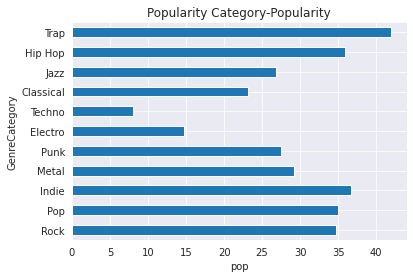

In [ ]:
ax = dfByGenre.groupby("GenreCategory").mean()["popularity"][["Rock", "Pop","Indie", "Metal","Punk","Electro","Techno","Classical","Jazz","Hip Hop","Trap"]].plot.barh(grid=True)
ax.set_xlabel("pop")
ax.set_title("Popularity Category-Popularity");

>This Graph Compares The Popularity of Songs from different genres. We can see that Hip Hop and its Subgenre Trap is the highest ranked 1st and 3rd genres. This may show us that it is a pretty mainstream type of music.

#### Analysis of the Most Popular Artists and Songs

In [ ]:
#if categorize_popularity(pop) == "popular":
df_new = df.loc[df["popularity"] > 90]
df_new.groupby(by = "popularity").mean().sort_values(by = "popularity", ascending = False)
#fig, ax = plt.subplots(1, 1, figsize=(20, 5))
#df_new.groupby("artists").popularity.mean().plot(kind = "bar")

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year
popularity,,,,,,,,,,,,,,
100,0.721000,0.585000,242014.000000,0.436000,1.000000,1.310000e-05,10.000000,0.105000,-8.761000,1.000000,0.060100,143.874000,0.132000,2021.000000
96,0.344500,0.718500,156425.500000,0.762000,1.000000,0.000000e+00,3.500000,0.182550,-4.164500,0.500000,0.062350,117.502000,0.719000,2020.000000
95,0.306500,0.797000,192018.500000,0.619500,1.000000,2.726000e-04,2.500000,0.108000,-7.108500,0.000000,0.103200,136.918000,0.491500,2020.000000
94,0.177660,0.789600,167209.400000,0.510800,0.600000,2.600000e-02,4.200000,0.134720,-6.823800,0.600000,0.132320,103.832000,0.559200,2020.000000
93,0.718000,0.675500,164633.000000,0.461000,0.500000,7.950000e-07,7.000000,0.111800,-8.939500,1.000000,0.203750,104.047000,0.311450,2020.000000
92,0.326733,0.764167,172124.666667,0.519667,0.500000,3.314688e-03,5.166667,0.101600,-6.937000,0.500000,0.150417,116.810667,0.488950,2020.166667
91,0.231208,0.654154,199612.846154,0.634154,0.307692,5.515385e-06,4.923077,0.221946,-6.208538,0.538462,0.077123,113.321846,0.490769,2019.769231


In [ ]:
df_new = df.loc[df["popularity"] > 90]
df_new.groupby(by = ["name","artists","popularity"]).mean().sort_values(by = "popularity", ascending = False)

,,,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year
name,artists,popularity,,,,,,,,,,,,,,
drivers license,['Olivia Rodrigo'],100,0.72100,0.585,242014,0.436,1,0.000013,10,0.1050,-8.761,1,0.0601,143.874,0.1320,2021
positions,['Ariana Grande'],96,0.46800,0.737,172325,0.802,1,0.000000,0,0.0931,-4.771,1,0.0878,144.015,0.6820,2020
Mood (feat. iann dior),"['24kGoldn', 'iann dior']",96,0.22100,0.700,140526,0.722,1,0.000000,7,0.2720,-3.558,0,0.0369,90.989,0.7560,2020
BICHOTA,['KAROL G'],95,0.21200,0.863,178947,0.666,1,0.000493,1,0.1030,-4.158,0,0.1520,163.908,0.8380,2020
DÁKITI,"['Bad Bunny', 'Jhay Cortez']",95,0.40100,0.731,205090,0.573,1,0.000052,4,0.1130,-10.059,0,0.0544,109.928,0.1450,2020
34+35,['Ariana Grande'],94,0.23700,0.830,173711,0.585,1,0.000000,0,0.2480,-6.476,1,0.0940,109.978,0.4850,2020
LA NOCHE DE ANOCHE,"['Bad Bunny', 'ROSALÍA']",94,0.03030,0.856,203201,0.618,0,0.000000,7,0.0866,-4.892,1,0.2860,81.993,0.3910,2020
Whoopty,['CJ'],94,0.19000,0.711,123429,0.598,1,0.000000,3,0.1500,-7.621,0,0.1820,140.175,0.7370,2020
WITHOUT YOU,['The Kid LAROI'],94,0.21300,0.662,161385,0.413,1,0.000000,0,0.1340,-7.357,1,0.0299,93.005,0.4670,2020


**MOST POPULAR SONGS:**

100- *drivers license* - Olivia Rodrigo

96-  *positions* - Ariana Grande

96-  *Mood (feat. iann dior)* - 24kGoldn, iann dior

In [ ]:
dfByArtist_new = dfByArtist.loc[dfByArtist["popularity"] > 85]
dfByArtist_new = dfByArtist_new.drop(["acousticness", "danceability","duration_ms","energy",	"instrumentalness", "liveness",	"loudness",	"speechiness",	"tempo",	"valence", "key", "mode", "count"], axis=1)
#dfByArtist_new.groupby(by = ["artists","popularity"]).mean().sort_values(by = "popularity", ascending = False)
dfByArtist_new.groupby(by = ["artists"]).mean().sort_values(by = "popularity", ascending = False)

,popularity
artists,
CJ,94.000000
Boza,92.000000
Joel Corry,91.000000
Juhn,91.000000
Lele Pons,89.000000
Los Legendarios,89.000000
Ritt Momney,89.000000
KIDDO,87.000000
DJ Nelson,86.000000


**MOST POPULAR ARTISTS:**

94- CJ

92-  Boza

91-  Joel Corry	

91-  Juhn

89-  Lele Pons

##### How Songs of Different Genres Change Over Time

In [ ]:
###
def categorize_years(year):
  if  year< 1930:
    return "1920s"
  elif year< 1940:
    return "1930s"
  elif year< 1950:
    return "1940s"
  elif year< 1960:
    return "1950s"
  elif year< 1970:
    return "1960s"
  elif year < 1980:
    return "1970s"
  elif year < 1990:
    return "1980s"
  elif year < 2000:
    return "1990s"
  elif year < 2010:
    return "2000s"  
  elif year < 2020:
    return "2010s"
  elif year > 2020:
    return "2020-"
  
dfByYear["Years Category"] = dfByYear["year"].apply(categorize_years)

In [ ]:
dfByYear.groupby(by = ["Years Category","year","popularity"]).mean().sort_values(by = "year", ascending = False)

acousticness  danceability  ...  key  mode
Years Category year popularity                              ...           
2020-          2021 7.750543        0.340253      0.652488  ...    7     1
2010s          2019 32.346930       0.261344      0.603101  ...    7     1
               2018 27.599484       0.233836      0.602731  ...    7     1
               2017 31.662338       0.207413      0.580475  ...    1     1
               2016 29.212431       0.226944      0.581583  ...    7     1
...                                      ...           ...  ...  ...   ...
20s            1924 0.661017        0.940200      0.549894  ...   10     1
               1923 5.205405        0.957247      0.577341  ...    0     1
               1922 0.090909        0.828934      0.575620  ...    5     1
               1921 0.391026        0.862105      0.432171  ...    2     1
               1920 0.610315        0.631242      0.515750  ...    2     1

[101 rows x 12 columns]

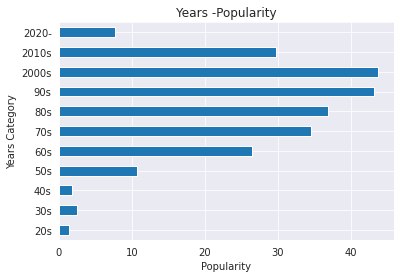

In [ ]:
ax = dfByYear.groupby("Years Category").mean()["popularity"][["20s","30s","40s","50s", "60s","70s", "80s","90s","2000s" ,"2010s","2020-"]].plot.barh(grid=True)
ax.set_xlabel("Popularity")
ax.set_title("Years -Popularity");

>Above chart show the relationship between years and Popularity

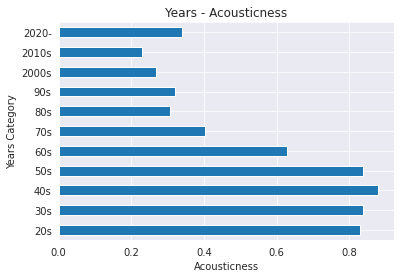

In [ ]:
ax = dfByYear.groupby("Years Category").mean()["acousticness"][["20s","30s","40s","50s", "60s","70s", "80s","90s","2000s" ,"2010s","2020-"]].plot.barh(grid=True)
ax.set_xlabel("Acousticness")
ax.set_title("Years - Acousticness");

>Above chart show the relationship between years and Acousticness

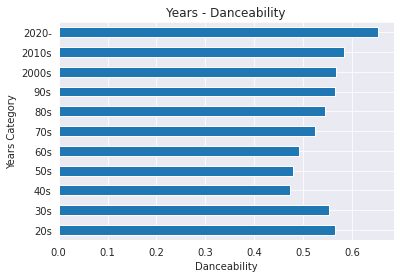

In [ ]:
ax = dfByYear.groupby("Years Category").mean()["danceability"][["20s","30s","40s","50s", "60s","70s", "80s","90s","2000s" ,"2010s","2020-"]].plot.barh(grid=True)
ax.set_xlabel("Danceability")
ax.set_title("Years - Danceability");

>Above chart show the relationship between years and Danceability

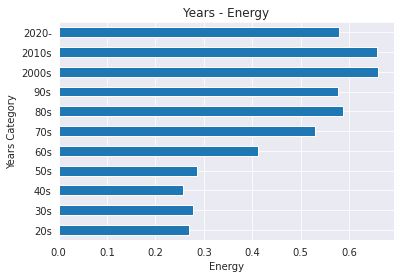

In [ ]:
ax = dfByYear.groupby("Years Category").mean()["energy"][["20s","30s","40s","50s", "60s","70s", "80s","90s","2000s" ,"2010s","2020-"]].plot.barh(grid=True)
ax.set_xlabel("Energy")
ax.set_title("Years - Energy");

>Above chart show the relationship between years and Energy

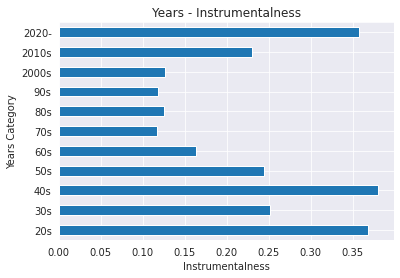

In [ ]:
ax = dfByYear.groupby("Years Category").mean()["instrumentalness"][["20s","30s","40s","50s", "60s","70s", "80s","90s","2000s" ,"2010s","2020-"]].plot.barh(grid=True)
ax.set_xlabel("Instrumentalness")
ax.set_title("Years - Instrumentalness");

>Above chart show the relationship between years and Instrumentalness.  Instrumentalnessflavtuates a lot, peaks at 40s and has  trough between 60s and 2000s.

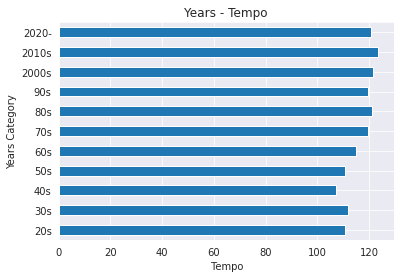

In [ ]:
ax = dfByYear.groupby("Years Category").mean()["tempo"][["20s","30s","40s","50s", "60s","70s", "80s","90s","2000s" ,"2010s","2020-"]].plot.barh(grid=True)
ax.set_xlabel(" Tempo")
ax.set_title("Years - Tempo");

>Above bar chart represents how tempo changes over years.It averages between 100 and 120 and peaks at 2010s.

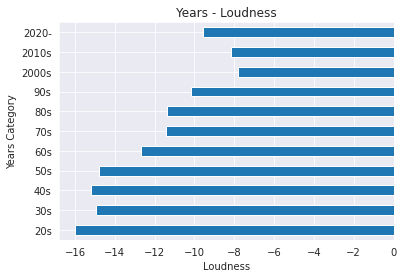

In [ ]:
ax = dfByYear.groupby("Years Category").mean()["loudness"][["20s","30s","40s","50s", "60s","70s", "80s","90s","2000s" ,"2010s","2020-"]].plot.barh(grid=True)
ax.set_xlabel("Loudness")
ax.set_title("Years - Loudness");

>Above bar chart show the loudness of songs over years.
Loudness is  between -16 and 0. It decreases over years but then also starts to increase after 2000s.

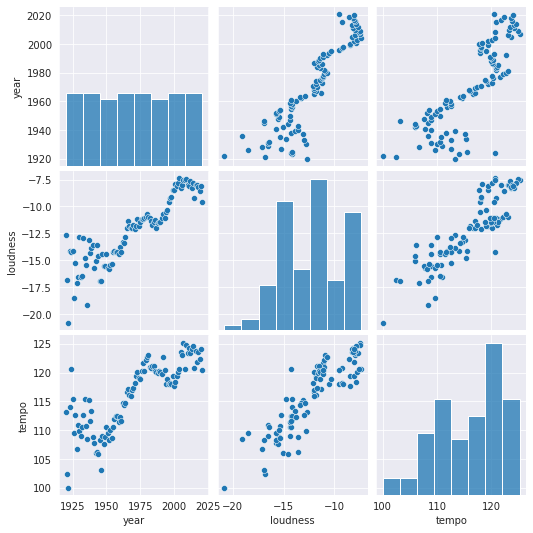

In [ ]:
sns.pairplot(dfByYear[["year", 'loudness', 'tempo']]);

> The Figures above show some correlation between different parameters


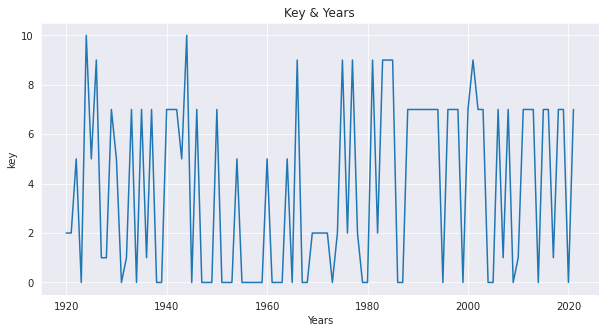

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
dfByYear.groupby("year").key.mean().plot()
plt.title("Key & Years")
plt.ylabel("key")
plt.xlabel("Years");

>Above figure show how the mean of keys changes over years. The keys flactuates alot has many ups and downs.

In [ ]:
###
def popular_genres_cat(genres):

  if (genres==("rock")):
    return "Rock"
  elif (genres==("pop")):
    return "Pop"
  elif (genres==("rap")):
    return "Rap"
  elif (genres==("classical")):
    return "Classical Music"
  elif (genres==("alternative rock")):
    return "Alternative Rock"
  elif (genres==("hip hop")):
    return "Hip-Hop"


DfMerged["Some Genres"] = DfMerged["genres"].apply(popular_genres_cat)
DfMerged["Years Category"] = DfMerged["year"].apply(categorize_years)

>Below table shows some specific genres *(Rap, Rock,Pop,Classical Music,Alternative Rock,Hip-Hop)* and their features , how they change over time.

In [ ]:
DfMerged.groupby(by = ["Years Category","Some Genres"]).mean().sort_values(by = "year", ascending = False)

acousticness  ...         year
Years Category Some Genres                     ...             
2020-          Rock                  0.432153  ...  2021.000000
               Rap                   0.176014  ...  2021.000000
               Pop                   0.346131  ...  2021.000000
               Hip-Hop               0.147439  ...  2021.000000
               Classical Music       0.923058  ...  2021.000000
               Alternative Rock      0.003945  ...  2021.000000
2010s          Rap                   0.169978  ...  2015.053140
               Pop                   0.233774  ...  2014.836590
               Classical Music       0.892247  ...  2014.628788
               Hip-Hop               0.177662  ...  2014.342459
               Rock                  0.159982  ...  2014.248101
               Alternative Rock      0.137683  ...  2012.753086
2000s          Pop                   0.182758  ...  2005.506527
               Rap                   0.127904  ...  2004.488564
               Classical Music       0.918809  ...  2004.303030
               Hip-Hop               0.141923  ...  2004.152635
               Rock                  0.148740  ...  2003.788321
               Alternative Rock      0.140711  ...  2003.395604
1990s          Hip-Hop               0.142458  ...  1995.548298
               Rap                   0.129732  ...  1995.541502
               Pop                   0.255302  ...  1995.008636
               Alternative Rock      0.153115  ...  1994.373304
               Classical Music       0.922547  ...  1994.265010
               Rock                  0.138670  ...  1994.060468
1980s          Hip-Hop               0.096507  ...  1986.402098
               Rap                   0.097070  ...  1986.379562
               Pop                   0.277633  ...  1985.150794
               Alternative Rock      0.139676  ...  1985.085308
               Classical Music       0.936965  ...  1984.388889
               Rock                  0.143668  ...  1984.260369
1970s          Alternative Rock      0.151774  ...  1976.104918
               Classical Music       0.924590  ...  1975.091603
               Rock                  0.296577  ...  1974.559277
               Hip-Hop               0.228272  ...  1974.500000
               Rap                   0.242612  ...  1974.485714
               Pop                   0.349030  ...  1973.983333
1960s          Alternative Rock      0.132385  ...  1968.777778
               Pop                   0.467188  ...  1967.523077
               Hip-Hop               0.225100  ...  1967.000000
               Rock                  0.390742  ...  1966.639625
               Rap                   0.323733  ...  1965.333333
               Classical Music       0.927372  ...  1962.367703
1950s          Rock                  0.679115  ...  1957.650000
               Pop                   0.872556  ...  1954.000000
               Classical Music       0.948408  ...  1953.517874
               Alternative Rock      0.081300  ...  1950.000000
1940s          Hip-Hop               0.993000  ...  1946.000000
               Classical Music       0.951817  ...  1945.724917
               Rock                  0.938083  ...  1945.500000
               Pop                   0.728390  ...  1942.255319
1930s          Hip-Hop               0.514000  ...  1935.000000
               Classical Music       0.935505  ...  1934.832864
               Rap                   0.034000  ...  1934.000000
               Pop                   0.404034  ...  1933.120000
1920s          Hip-Hop               0.968000  ...  1929.000000
               Classical Music       0.981548  ...  1927.115447
               Pop                   0.528364  ...  1920.000000

[57 rows x 15 columns]

>Below table shows the most popular genres and their characteristics over time by years.

In [ ]:
popular_genres= DfMerged.sort_values("popularity", ascending=False).head(500)

popular_genres.groupby(by = ["Years Category","genres"]).mean().sort_values(by = "year", ascending = False)

acousticness  ...         year
Years Category genres                                 ...             
2020-          post-teen pop                0.451000  ...  2021.000000
               pop                          0.451000  ...  2021.000000
               canadian pop                 0.181000  ...  2021.000000
2010s          german dance                 0.223000  ...  2019.000000
               reggaeton colombiano         0.295000  ...  2019.000000
               reggaeton                    0.295000  ...  2019.000000
               queens hip hop               0.295000  ...  2019.000000
               pop rock                     0.837000  ...  2019.000000
               pop rap                      0.295000  ...  2019.000000
               pop edm                      0.223000  ...  2019.000000
               trap                         0.104000  ...  2019.000000
               trap latino                  0.295000  ...  2019.000000
               latin                        0.295000  ...  2019.000000
               hip pop                      0.295000  ...  2019.000000
               scandipop                    0.223000  ...  2019.000000
               dfw rap                      0.192000  ...  2019.000000
               tropical house               0.223000  ...  2019.000000
               edm                          0.223000  ...  2019.000000
               bedroom pop                  0.598000  ...  2019.000000
               pop dance                    0.333667  ...  2018.666667
               melodic rap                  0.209980  ...  2018.600000
               electropop                   0.631000  ...  2018.500000
               australian pop               0.587500  ...  2018.500000
               chicago rap                  0.251300  ...  2018.333333
               rap                          0.108825  ...  2018.250000
               post-teen pop                0.256433  ...  2018.166667
               australian dance             0.483000  ...  2018.000000
               pop                          0.457244  ...  2017.687500
               dance pop                    0.262475  ...  2017.500000
               uk pop                       0.726000  ...  2017.500000
               miami hip hop                0.469000  ...  2017.000000
               emo rap                      0.469000  ...  2017.000000
               talent show                  0.701000  ...  2016.000000
               modern alternative rock      0.058650  ...  2014.000000
               modern rock                  0.058650  ...  2014.000000
1990s          urban contemporary           0.164000  ...  1994.000000
               pop                          0.164000  ...  1994.000000
               dance pop                    0.164000  ...  1994.000000
1960s          brill building pop           0.614000  ...  1964.000000
               vocal jazz                   0.614000  ...  1964.000000
               adult standards              0.614000  ...  1964.000000

[41 rows x 15 columns]

In [ ]:
###
def rockgenre(genres):

  if (genres==("rock")):
    return "Rock"
DfMerged["Rock"] = DfMerged["genres"].apply(rockgenre)

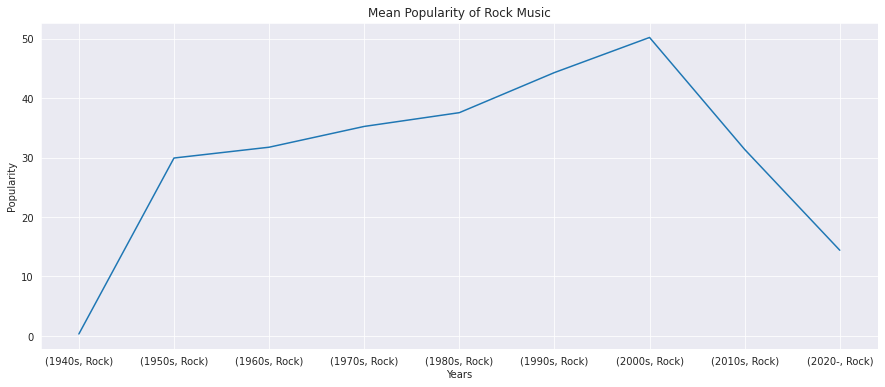

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))

DfMerged.groupby(by = ["Years Category","Rock"]).popularity.mean().plot(label="Popularity");#blue

plt.title("Mean Popularity of Rock Music")
plt.xlabel("Years");
plt.ylabel("Popularity");

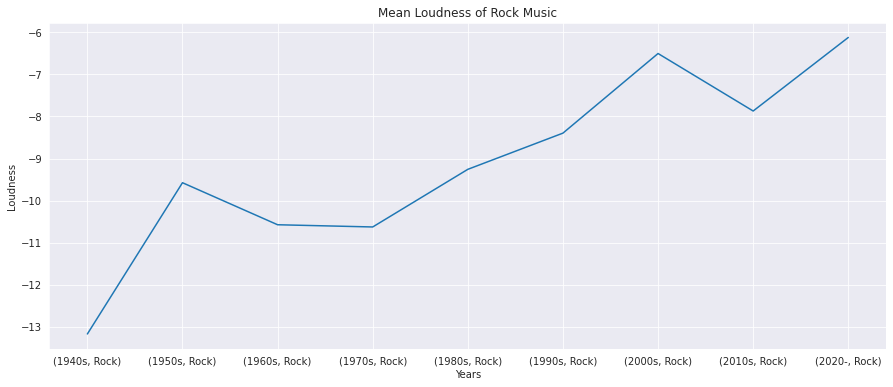

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))

DfMerged.groupby(by = ["Years Category","Rock"]).loudness.mean().plot(label="Loudness"); #red

plt.title("Mean Loudness of Rock Music")
plt.ylabel("Loudness")
plt.xlabel("Years");

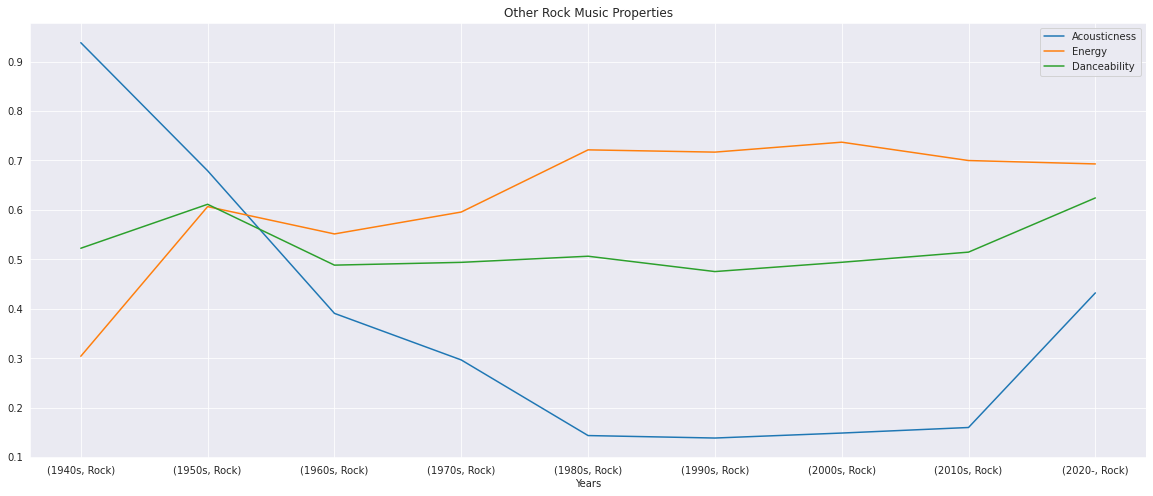

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

DfMerged.groupby(by = ["Years Category","Rock"]).acousticness.mean().plot(label="Acousticness");#yellow
DfMerged.groupby(by = ["Years Category","Rock"]).energy.mean().plot(label="Energy") ;#purple
DfMerged.groupby(by = ["Years Category","Rock"]).danceability.mean().plot(label="Danceability"); #green

plt.legend()
plt.title("Other Rock Music Properties")
plt.xlabel("Years");

> These figures show some Rock Music Features changes over time.

* Popularity decreased between  2000s - 2020s other than that its popularity have been increasing.
*It's Loudness is positively correlated with the Years, As the Years went on Loudness is relativly increased


In [ ]:
###
def Popgenre(genres):

  if (genres==("pop")):
    return "Pop"
DfMerged["Pop"] = DfMerged["genres"].apply(Popgenre)

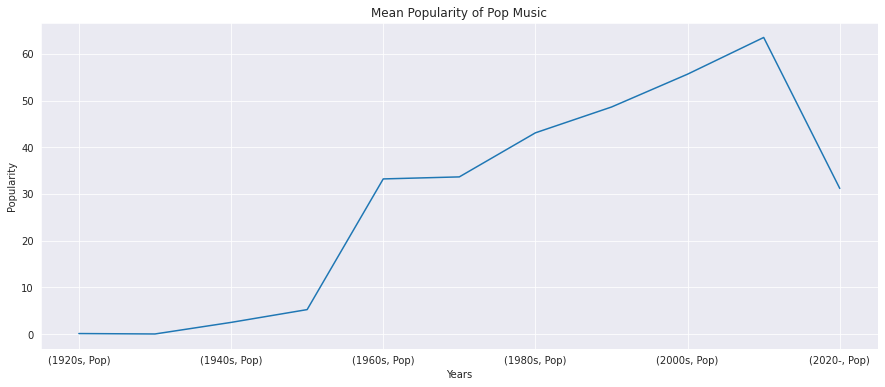

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
DfMerged.groupby(by = ["Years Category","Pop"]).popularity.mean().plot(label="Popularity")#blue
plt.title("Mean Popularity of Pop Music")

plt.ylabel("Popularity");
plt.xlabel("Years");

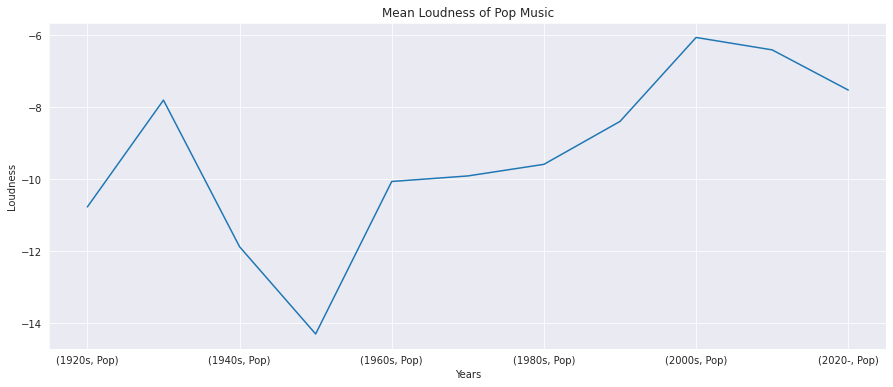

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
DfMerged.groupby(by = ["Years Category","Pop"]).loudness.mean().plot(label="Loudness") #red

plt.title("Mean Loudness of Pop Music")
plt.ylabel("Loudness")
plt.xlabel("Years");

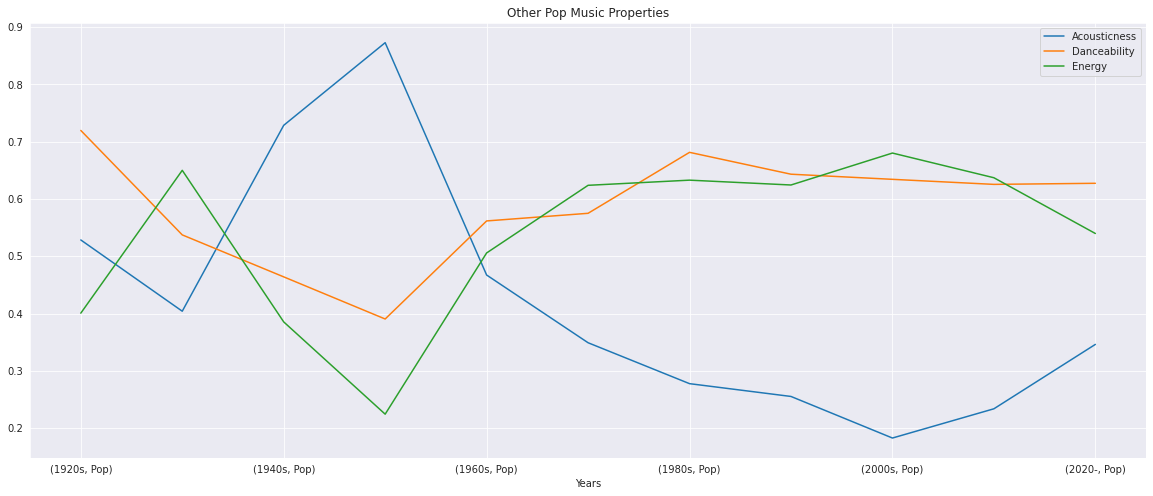

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
DfMerged.groupby(by = ["Years Category","Pop"]).acousticness.mean().plot(label="Acousticness")#yellow
DfMerged.groupby(by = ["Years Category","Pop"]).danceability.mean().plot(label="Danceability") #green
DfMerged.groupby(by = ["Years Category","Pop"]).energy.mean().plot(label="Energy") #purple

plt.legend()
plt.title("Other Pop Music Properties")
plt.xlabel("Years");

>These figures show some Pop Music Features changes over time.
* It's popularity kept on increasing over the passing years untill 2010s.
* Loudness kept on increasing except from 30's to 50's and 2000's to 2020's
*It's acousticness changes rapidly while the other stats are fairly stable.

In [ ]:
###
def rapgenre(genres):

  if (genres==("rap")):
    return "Rap"
DfMerged["Rap"] = DfMerged["genres"].apply(rapgenre)

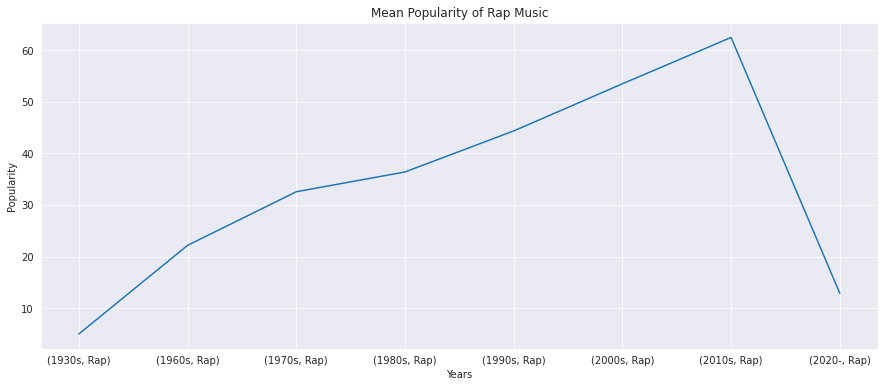

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
DfMerged.groupby(by = ["Years Category","Rap"]).popularity.mean().plot(label="Popularity")#blue

plt.title("Mean Popularity of Rap Music")
plt.ylabel("Popularity")
plt.xlabel("Years");

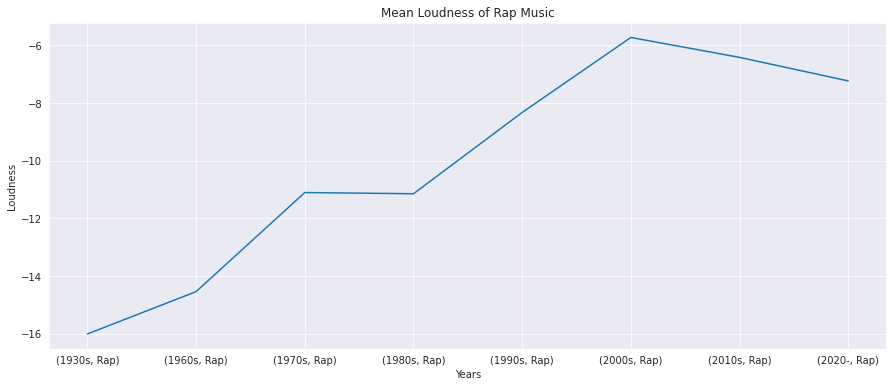

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
DfMerged.groupby(by = ["Years Category","Rap"]).loudness.mean().plot(label="Loudness") #red

plt.title("Mean Loudness of Rap Music")
plt.ylabel("Loudness")
plt.xlabel("Years");

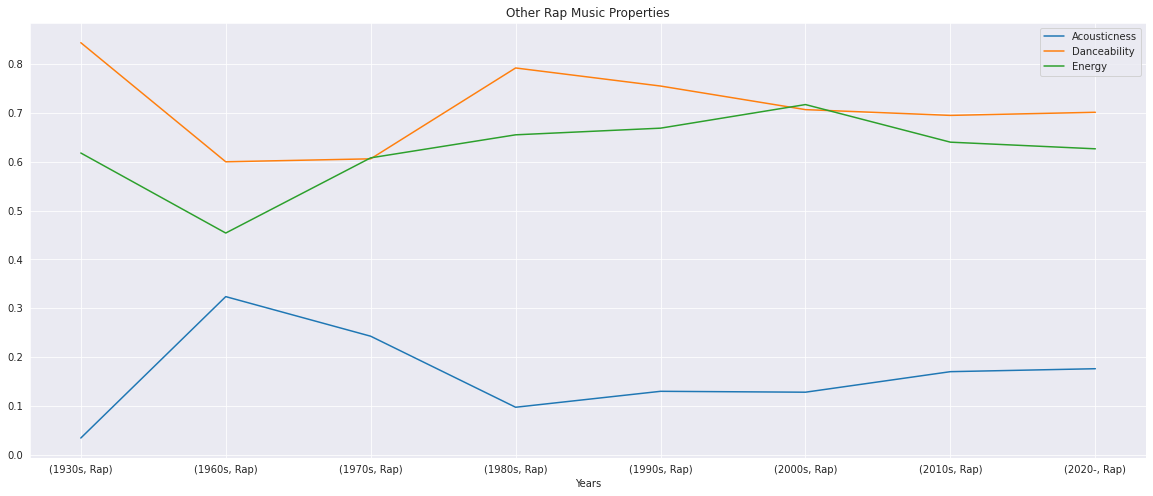

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
DfMerged.groupby(by = ["Years Category","Rap"]).acousticness.mean().plot(label="Acousticness")#yellow
DfMerged.groupby(by = ["Years Category","Rap"]).danceability.mean().plot(label="Danceability") #green
DfMerged.groupby(by = ["Years Category","Rap"]).energy.mean().plot(label="Energy") #purple

plt.legend()
plt.title("Other Rap Music Properties")
plt.xlabel("Years");

>These figures show some Rap Music Features changes over time.

* It's popularity was stabily rasing Until 2020's. After 2010's there is a sharp decrase
*It's Loudness had been on an increase until 2000's after that part there is a slight decrease.
*It's Energy has been slightly increasing over the years. The other stats are fairly stable.


In [ ]:
###
def hiphopgenre(genres):

  if (genres==("hip hop")):
    return "Hip-Hop"
DfMerged["Hip-Hop"] = DfMerged["genres"].apply(hiphopgenre)

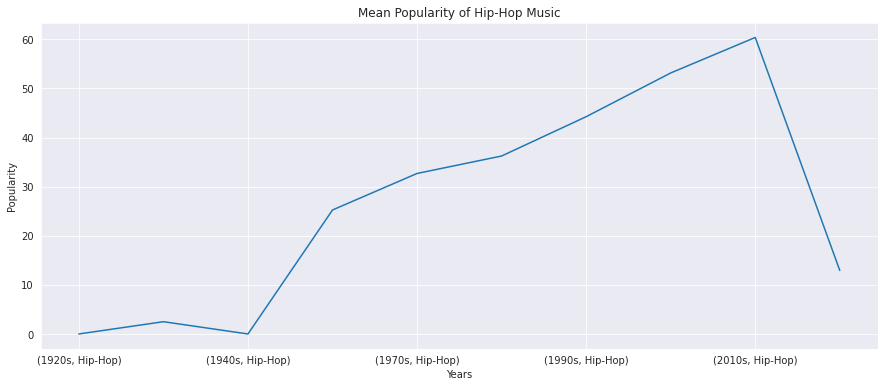

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
DfMerged.groupby(by = ["Years Category","Hip-Hop"]).popularity.mean().plot(label="Popularity")#blue

plt.title("Mean Popularity of Hip-Hop Music")
plt.ylabel("Popularity");
plt.xlabel("Years");

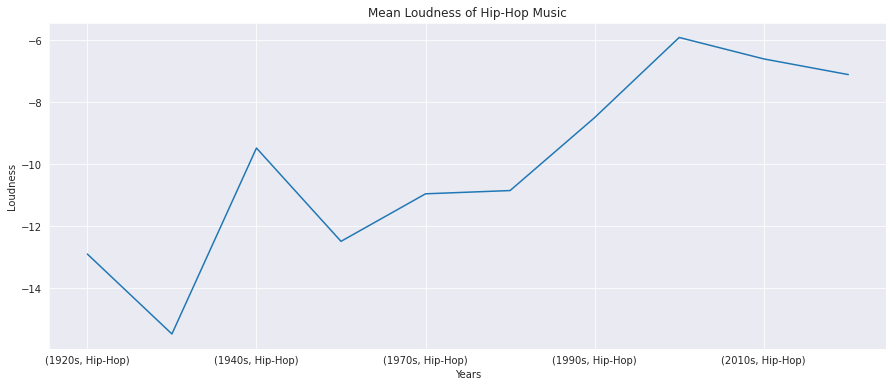

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
DfMerged.groupby(by = ["Years Category","Hip-Hop"]).loudness.mean().plot(label="Loudness") #red

plt.title("Mean Loudness of Hip-Hop Music")
plt.ylabel("Loudness");
plt.xlabel("Years");

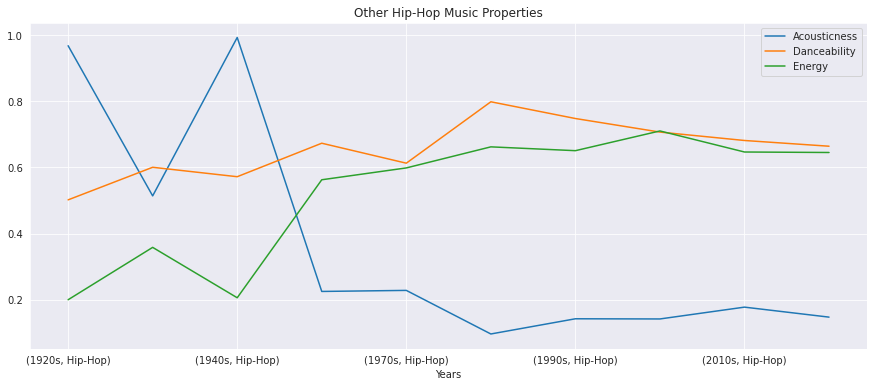

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

DfMerged.groupby(by = ["Years Category","Hip-Hop"]).acousticness.mean().plot(label="Acousticness")#yellow
DfMerged.groupby(by = ["Years Category","Hip-Hop"]).danceability.mean().plot(label="Danceability") #green
DfMerged.groupby(by = ["Years Category","Hip-Hop"]).energy.mean().plot(label="Energy") #purple

plt.legend()
plt.title("Other Hip-Hop Music Properties")
plt.xlabel("Years");

>These figures show some of  Hip-Hop Features changes over time.

*   Popularity has a positive slope most of the time , peaks at 2010s. Overall has a mid level of popularity most of the time.
*   Acoustiveness also flactuates a lot and seems to be negatively correlated  with ppularity
*   Danceability and energy are  positively correlated slightly and both has 2 troughs at 10s and 50s . 
*   Loudness peaks at 2010s and seems to be positively realted with popularity and energy.

In [ ]:
###
def classicalgenre(genres):

  if (genres==("classical")):
    return "Classical Music"
DfMerged["Classical Music"] = DfMerged["genres"].apply(classicalgenre)

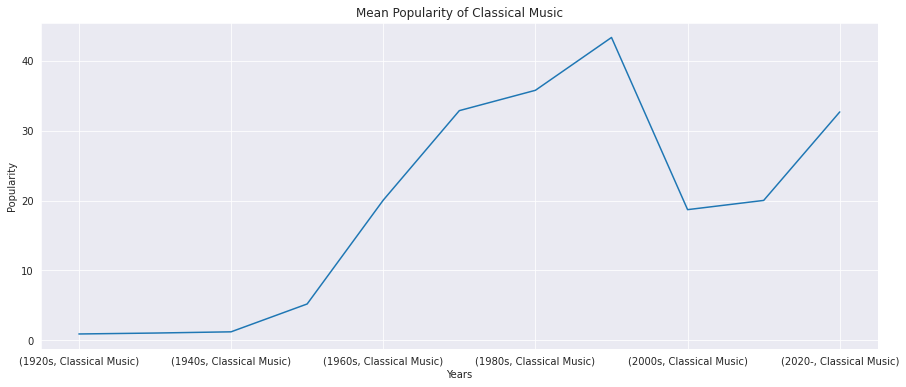

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))

DfMerged.groupby(by = ["Years Category","Classical Music"]).popularity.mean().plot(label="Popularity")#blue

plt.title("Mean Popularity of Classical Music")
plt.ylabel("Popularity");
plt.xlabel("Years");

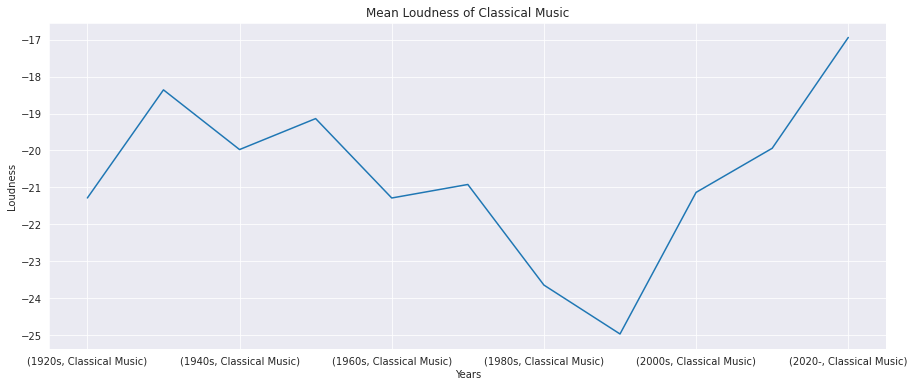

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))

DfMerged.groupby(by = ["Years Category","Classical Music"]).loudness.mean().plot(label="Loudness") #red

plt.title("Mean Loudness of Classical Music")
plt.ylabel("Loudness");
plt.xlabel("Years");

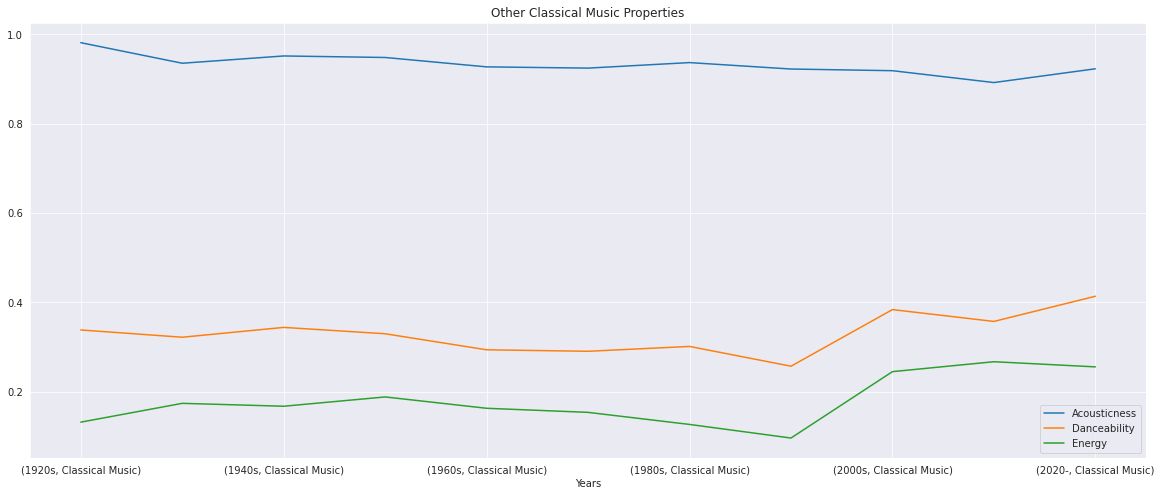

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

DfMerged.groupby(by = ["Years Category","Classical Music"]).acousticness.mean().plot(label="Acousticness")#yellow
DfMerged.groupby(by = ["Years Category","Classical Music"]).danceability.mean().plot(label="Danceability") #green
DfMerged.groupby(by = ["Years Category","Classical Music"]).energy.mean().plot(label="Energy") #purple

plt.legend()
plt.title("Other Classical Music Properties")
plt.xlabel("Years");

>This figure shows some of  Classical Music Features changes over time.

*   Popularity hits peak at 90. Has a lot of flactuations ,through and peaks. There is a big increase popularity of Classical Music between 50s and 90s.But mostly not very popular.
*   Acoustiveness is relatively stable.
*   Danceability and energy are highly positively correlated and both has  through at 1930s so in this period Danceability and energy of classical music is lower than other years . 
*   Loudness peaks at 2020s and 90s.

In [ ]:
###
def altrockgenre(genres):

  if (genres==("alternative rock")):
    return "Alternative Rock"
DfMerged["Alternative Rock"] = DfMerged["genres"].apply(altrockgenre)

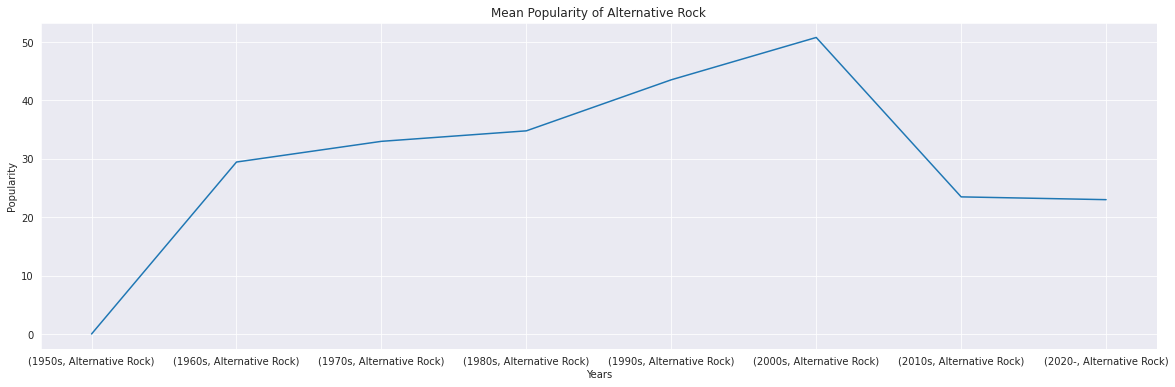

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))

DfMerged.groupby(by = ["Years Category","Alternative Rock"]).popularity.mean().plot( label="Popularity")#blue

plt.title("Mean Popularity of Alternative Rock")
plt.xlabel("Years");
plt.ylabel("Popularity");

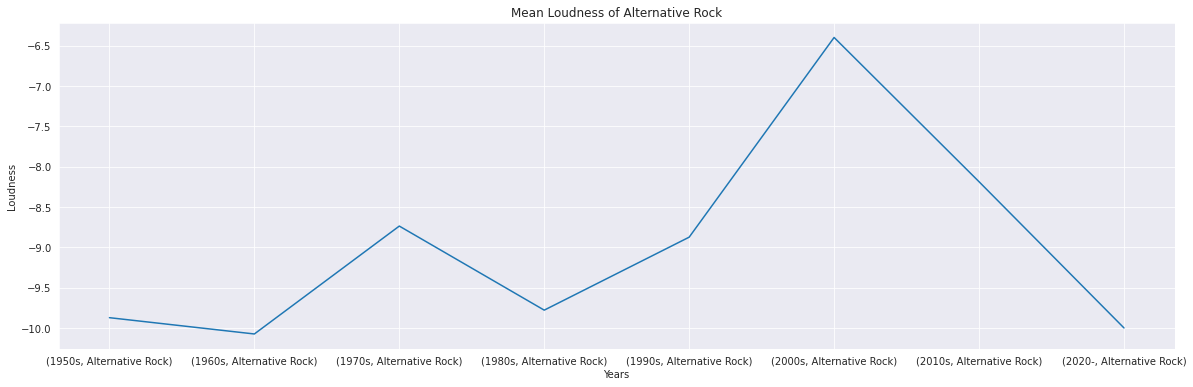

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))

DfMerged.groupby(by = ["Years Category","Alternative Rock"]).loudness.mean().plot(label="Loudness") #red

plt.title("Mean Loudness of Alternative Rock")
plt.xlabel("Years");
plt.ylabel("Loudness");

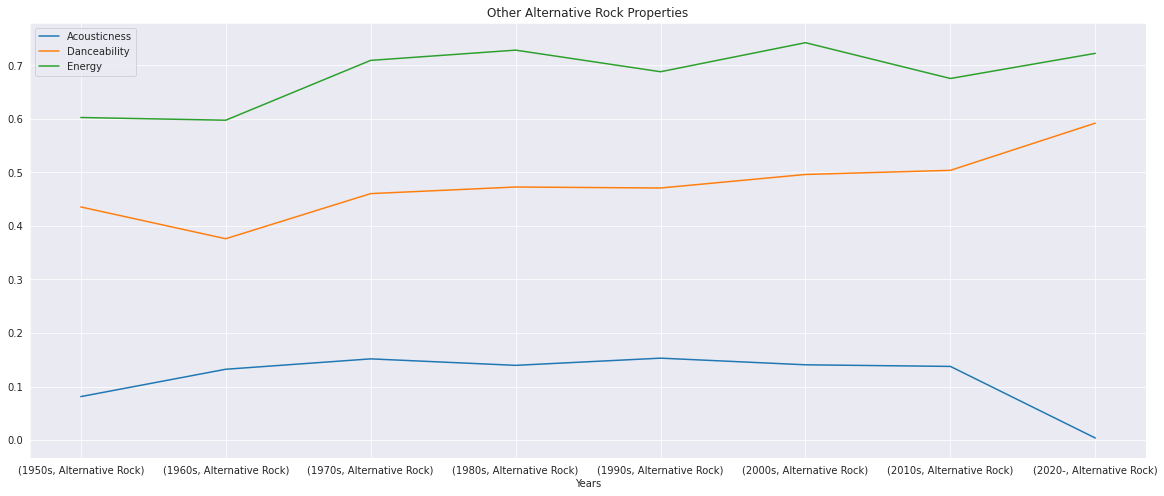

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

DfMerged.groupby(by = ["Years Category","Alternative Rock"]).acousticness.mean().plot(label="Acousticness")#yellow
DfMerged.groupby(by = ["Years Category","Alternative Rock"]).danceability.mean().plot(label="Danceability") #green
DfMerged.groupby(by = ["Years Category","Alternative Rock"]).energy.mean().plot(label="Energy") #purple

plt.legend()

plt.title("Other Alternative Rock Properties")
plt.xlabel("Years");

>These figures show some Alternative Rock Music Features changes over time.


*   Popularity hits bottom at 50s and hits peak at 2000s, popularity of alternative rock decreases after 2000s this maybe because there are more new genres.
*   Acoustiveness is relatively stable.
*   Danceability and energy are highly positively correlated and both peaks at 2020.
*   Loudness peaks at 2020s and 60s with -10 and and seem to be slightly positively correlated with popularity.


# Hypothesis Testing

**Hypothesis Test 1:** 
We want to test whether there is significant differences in terms of popularity for different values of explicity (0 and 1).

**Null Hypothesis ($H_0$)**: Means of `popularity` samples for all explicity values are same (e.g. $p_1$ denotes  popularity of 1st sample). 

$ H_0: \mu_{p_1} = \mu_{p_2} $

**Alternative Hypothesis ($H_A$)**: Means of `popularity` samples for all explicity values are different. 

$ H_A:$ Means $\mu_{p_1}, \mu_{p_2}$ are not same.

**Significance level**: As most of hypothesis tests assume significance level as `0.05`, we are setting it as `0.05` for our test too.

In [ ]:
# Creating samples based on target attribute
sample_1, sample_2 = [DfMerged[DfMerged["explicit"] == i] for i in range(0,2)]
samplettest1=DfMerged[DfMerged["explicit"] == 0]["popularity"] 
samplettest2=DfMerged[DfMerged["explicit"] == 1]["popularity"] 

Before applying an appropriate test, we can also visualize these samples to observe the possible statistical difference.

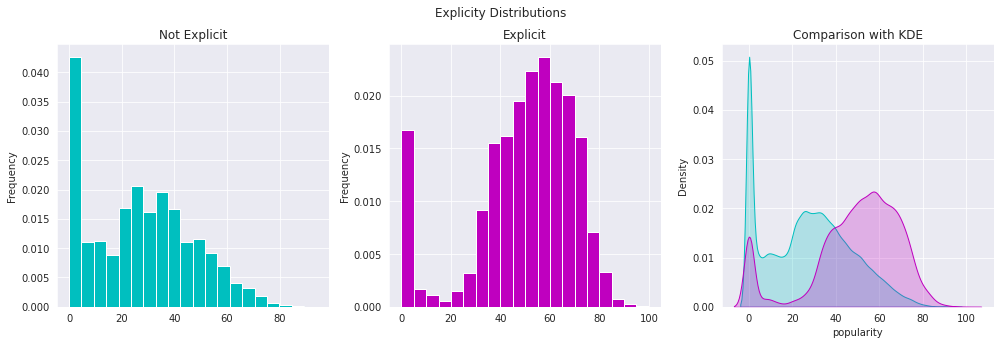

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,5))
        
sample_1["popularity"].plot(kind="hist", ax=ax[0], bins=20, label="completed", color="c", density=True)
ax[0].set_title("Not Explicit")

sample_2["popularity"].plot(kind="hist", ax=ax[1], bins=20, label="none", color="m", density=True)
ax[1].set_title("Explicit")

sns.kdeplot(sample_1["popularity"], shade=True, label="Not Explicit", ax=ax[2], color="c")
sns.kdeplot(sample_2["popularity"], shade=True, label="Explicit", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Explicity Distributions")
# To avoid suptitle and titles of ax titles colliding
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Since we want to test 2 samples simultaneously, Two-Sample T-test is a test that we can apply here. From here we calculate the p value with t-test.

In [ ]:
stats.ttest_ind(samplettest1, samplettest2, equal_var=False) 

Ttest_indResult(statistic=-249.36246600880153, pvalue=0.0)

**Interpreting results:**
>~0.0 < 0.05

>As p-value we obtained was too small for Python to calculate it is smaller than the threshold significance level 0.05, we can conclude that means of popularity samples are not the same. Here, we reject the null hypothesis.

**Hypothesis Test 2:** We want to test whether there is significant differences in terms of popularity for different keys (samples are taken from key 5 and key 6 ).

**Null Hypothesis ($H_0$)**: Means of `popularity` samples for all keys are same (e.g. $p_1$ denotes  popularity of 1st sample).

$ H_0: \mu_{p_1} = \mu_{p_2} $

**Alternative Hypothesis ($H_A$)**: Means of `popularity` samples for all keys are different.

$ H_A:$ Means $\mu_{p_1}, \mu_{p_2}$ are not same.

**Significance level**: As most of hypothesis tests assume significance level as `0.05`, we are setting it as `0.05` for our test too.



In [ ]:
sample0, sample1 = [DfMerged[DfMerged["key"] == i] for i in range(5,7)]
samplettest1=DfMerged[DfMerged["key"] == 5]["popularity"] 
samplettest2=DfMerged[DfMerged["key"] == 6]["popularity"] 

Before applying an appropriate test, we can also visualize these samples to observe the possible statistical difference.

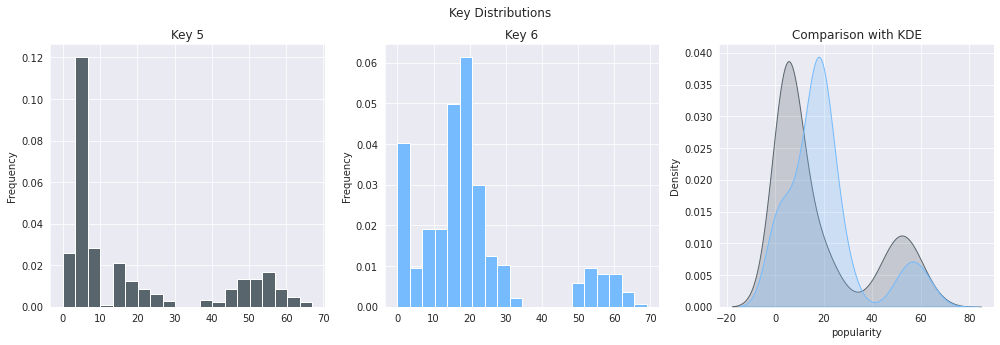

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,5))
        
sample0["popularity"].plot(kind="hist", ax=ax[0], bins=20, label="completed", color="xkcd:slate grey", density=True)
ax[0].set_title("Key 5")

sample1["popularity"].plot(kind="hist", ax=ax[1], bins=20, label="none", color="xkcd:sky blue", density=True)
ax[1].set_title("Key 6")



sns.kdeplot(sample0["popularity"], shade=True, label="Key 5", ax=ax[2], color="xkcd:slate grey")
sns.kdeplot(sample1["popularity"], shade=True, label="Key 6", ax=ax[2], color="xkcd:sky blue")

ax[2].set_title("Comparison with KDE")

plt.suptitle("Key Distributions")
# To avoid suptitle and titles of ax titles colliding
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()




Since we want to test 2 samples simultaneously, Two-Sample T-test is a test that we can apply here. From here we calculate the p value with t-test.



In [ ]:
stats.ttest_ind(samplettest1, samplettest2, equal_var=False) 

Ttest_indResult(statistic=-37.151234973375125, pvalue=2.32488893902949e-299)

**Interpreting results:**
>2.32488893902949e-299 < 0.05

>As p-value we obtained is smaller than the threshold significance level 0.05, we can conclude that means of popularity samples are not the same nor close to each other. Hence, we reject the null hypothesis.


**Hypothesis Test 3:** We want to test whether there is significant differences in terms of loudness for 70s and 80s Rap Music (1st sample denotes 70s Rap Music, 2nd sample denotes 80s Rap Music).

**Null Hypothesis ($H_0$)**: Means of `loudness` samples for 70s and 80s Rap Music are same (e.g. $l_1$ denotes  loudness of 1st sample).

$ H_0: \mu_{l_1} = \mu_{l_2} $

**Alternative Hypothesis ($H_A$)**: Means of `loudness` samples for 70s and 80s Rap Music are different.

$ H_A:$ Means $\mu_{l_1}, \mu_{l_2}$ are not same.

**Significance level**: As most of hypothesis tests assume significance level as `0.05`, we are setting it as `0.05` for our test too.

In [ ]:
sample0 = DfMerged[DfMerged["Years Category"] == "1970s"]
sample0 = sample0[sample0["Rap"] == "Rap"]
sample1 = DfMerged[DfMerged["Years Category"] == "1980s"]
sample1 = sample1[sample1["Rap"] == "Rap"]

Before applying an appropriate test, we can also visualize these samples to observe the possible statistical difference.

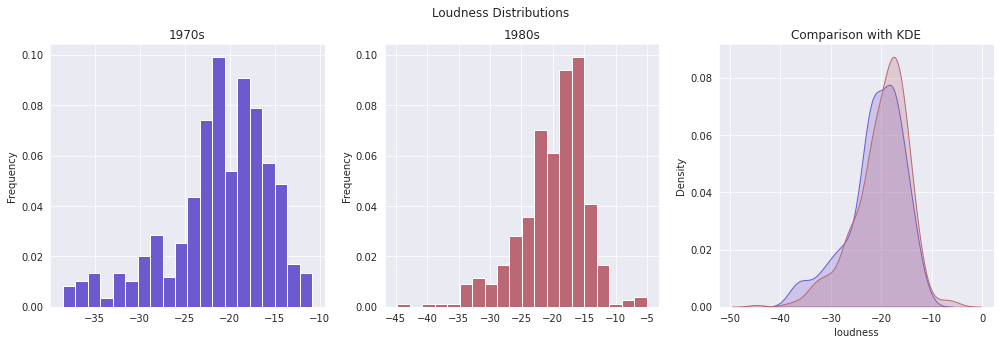

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,5))
        
sample0["loudness"].plot(kind="hist", ax=ax[0], bins=20, label="completed", color="xkcd:light indigo", density=True)
ax[0].set_title("1970s")

sample1["loudness"].plot(kind="hist", ax=ax[1], bins=20, label="none", color="xkcd:dusky rose", density=True)
ax[1].set_title("1980s")



sns.kdeplot(sample0["loudness"], shade=True, label="1970s", ax=ax[2], color="xkcd:light indigo")
sns.kdeplot(sample1["loudness"], shade=True, label="1980s", ax=ax[2], color="xkcd:dusky rose")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Loudness Distributions")
# To avoid suptitle and titles of ax titles colliding
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Since we want to test 2 samples simultaneously, ANOVA is a test that we can apply here. Below, we introduce our samples to ANOVA test.

In [ ]:
from scipy.stats import f_oneway
f_stats, p_values = f_oneway(sample0["loudness"].values, sample1["loudness"].values)
p_values

0.9296732081671646

**Interpreting results:**
>0.929 > 0.05

>As p-value we obtained is greater than the threshold significance level 0.05, we can conclude that means of loudness samples of 1970's and 1980's Rap are the same or very close to each other. Hence, we have failed to reject the null hypothesis.


**Hypothesis Test 4:** We want to test whether there is significant differences in terms of popularity for 2000s and 2010s  Classical Music (1st sample denotes 2000s Classical Music, 2nd sample denotes 2010s Classical Music).

**Null Hypothesis ($H_0$)**: Means of `popularity` samples for 2000s and 2010s  Classical Music are same (e.g. $p_1$ denotes  popularity of 1st sample).

$ H_0: \mu_{p_1} = \mu_{p_2} $

**Alternative Hypothesis ($H_A$)**: Means of `popularity` samples for 2000s and 2010s  Classical Music are different.

$ H_A:$ Means $\mu_{p_1}, \mu_{p_2}$ are not same.

**Significance level**: As most of hypothesis tests assume significance level as `0.05`, we are setting it as `0.05` for our test too.

In [ ]:
sample0 = DfMerged[DfMerged["Years Category"] == "2000s"]
sample0 = sample0[sample0["Classical Music"] == "Classical Music"]
sample1 = DfMerged[DfMerged["Years Category"] == "2010s"]
sample1 = sample1[sample1["Classical Music"] == "Classical Music"]

Before applying an appropriate test, we can also visualize these samples to observe the possible statistical difference.

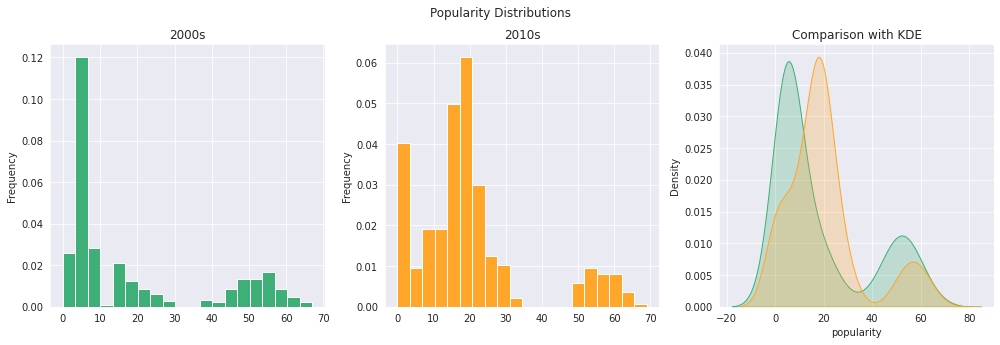

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,5))
        
sample0["popularity"].plot(kind="hist", ax=ax[0], bins=20, label="completed", color="xkcd:dark seafoam green", density=True)
ax[0].set_title("2000s")

sample1["popularity"].plot(kind="hist", ax=ax[1], bins=20, label="none", color="xkcd:mango", density=True)
ax[1].set_title("2010s")



sns.kdeplot(sample0["popularity"], shade=True, label="2000s", ax=ax[2], color="xkcd:dark seafoam green")
sns.kdeplot(sample1["popularity"], shade=True, label="2010s", ax=ax[2], color="xkcd:mango")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Popularity Distributions")
# To avoid suptitle and titles of ax titles colliding
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Since we want to test 2 samples simultaneously, ANOVA is a test that we can apply here. Below, we introduce our samples to ANOVA test.

In [ ]:
from scipy.stats import f_oneway
f_stats, p_values = f_oneway(sample0["popularity"].values, sample1["popularity"].values)
p_values

0.29711595762485876

**Interpreting results:**
>0.29711595762485876 > 0.05

>As p-value we obtained is greater than the threshold significance level 0.05, we can conclude that means of popularity samples are the same or close to each other. Hence, we failed to reject the null hypothesis.

## Future Work

<font color="black">
Our project has one remaining part, namely Machine Learning. In the light of the information we got from the previous parts, we will create a simple song recommendation system using similarity metrics and Nearest Neighbors methods. The song recommendation system will recommend songs similar to the ones given in the input. Additively, we will predict the popularity of songs with some machine learning models and show efforts on hyper tuning for the purpose of increasing the performance of those models. 

</font>